# Lecture 4 Linear Regression

## 🧪 Lab: Using `requirements.txt` to Build a Clean Environment

In this lab, you will learn how to:
1. Create a `requirements.txt` file.  
2. Build a **fresh virtual environment** just for our regression project.  
3. Install only the packages listed in `requirements.txt`.  
4. Verify the environment and run a quick test.  

This keeps your setup clean and reproducible.

---

### 1. Create a `requirements.txt` file

Copy the following into a text file named **`requirements.txt`** and place it at the root of your BUS_659 folder:

```txt
numpy==1.26.4
pandas==2.0.3
scikit-learn==1.4.2
statsmodels==0.14.2
matplotlib==3.9.2
seaborn==0.13.2
jupyter==1.0.0

### 2. Create a New Virtual Environment

We’ll name this environment **`linreg_env`** so it doesn’t conflict with your existing **`bus_659_env`**.

---

#### 🪟 On Windows (PowerShell)

```powershell
# Create a new virtual environment
python -m venv linreg_env

# Activate it
.\linreg_env\Scripts\activate

# Upgrade pip
python -m pip install --upgrade pip

# Install only the packages in requirements.txt
pip install -r requirements.txt
```

#### macOS / Linux (Terminal)


```bash
# Create a new virtual environment
python3 -m venv linreg_env

# Activate it
source linreg_env/bin/activate

# Upgrade pip
python -m pip install --upgrade pip

# Install only the packages in requirements.txt
pip install -r requirements.txt
```

In [3]:
## note now you need to switch the environment in your jupyter notebook to linreg_env
# !python3 -m venv linreg_env

# # Activate it
# !source linreg_env/bin/activate

# Upgrade pip
!python3 -m pip install --upgrade pip

# Install only the packages in requirements.txt
!pip3 install -r requirements.txt


## Why Use a `requirements.txt` File?

In Python projects, different packages (and their versions) can sometimes **conflict** with each other.  
To avoid this, we use a file called **`requirements.txt`** to:

- 📦 **List the exact packages and versions** the project needs.  
- 🔁 **Make your environment reproducible** — everyone in class installs the same versions, so results match.  
- 🧹 **Keep things clean** — instead of installing lots of random packages, we only install what’s needed.  
- 🤝 **Share easily** — if someone else wants to run your project, they just do:

```bash
pip install -r requirements.txt

In [4]:
# make sure you switch to linreg_env in the juputer notebook kernel before running this! 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

/Users/matthewtonks/.matplotlib is not a writable directory
Matplotlib created a temporary cache directory at /var/folders/cg/drmdpssj7b1g61ncm5ng3gww0000gn/T/matplotlib-4nzwhd88 because there was an issue with the default path (/Users/matthewtonks/.matplotlib); it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Matplotlib is building the font cache; this may take a moment.


## Regression models in statsmodels

In [5]:
# let's generate some example data 

# Set random seed for reproducibility
np.random.seed(42)

# Generate sample size
n = 100

# Two predictors
x1 = np.random.normal(5, 2, n)       # around 5, sd=2
x2 = np.random.normal(10, 3, n)      # around 10, sd=3

# True relationship: y = 3 + 2*x1 - 0.5*x2 + error
error = np.random.normal(0, 2, n)    # noise
y = 3 + 2*x1 - 0.5*x2 + error

# Put in DataFrame
df = pd.DataFrame({"y": y, "x1": x1, "x2": x2})

df.head()

,y,x1,x2
0,12.825487,5.993428,5.753888
1,9.199480,4.723471,8.738064
2,13.270928,6.295377,8.971856
3,17.403139,8.046060,7.593168
4,4.549976,4.531693,9.516143


### Running an OLS Regression in Python

In this example, we are estimating a **linear regression model** using the 
`statsmodels` library.

The formula we pass to `ols` follows the convention:

- `y ~ x1 + x2` means our dependent variable `y` is explained by predictors `x1` and `x2`.
- `data=df` tells Python to look for those variables in our DataFrame `df`.

The `.fit()` method estimates the model, and `mod.summary()` prints a full regression 
table including coefficients, standard errors, t-stats, p-values, and goodness-of-fit 
metrics like R-squared.

In [6]:

# Example: y ~ x1 + x2
mod = smf.ols("y ~ x1 + x2", data=df).fit()


In [7]:
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     214.8
Date:                Wed, 17 Sep 2025   Prob (F-statistic):           2.33e-36
Time:                        19:27:36   Log-Likelihood:                -216.94
No. Observations:                 100   AIC:                             439.9
Df Residuals:                      97   BIC:                             447.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1287      1.043      2.041      0.0

In [8]:
tab = pd.DataFrame({
    "Predictor": mod.params.index,
    "Estimate":  mod.params.values,
    "Std. Error":mod.bse.values,
    "t":         mod.tvalues.values,
    "p-value":   mod.pvalues.values
})
ci = mod.conf_int()
tab["95% CI"] = [f"[{lo:.2f}, {hi:.2f}]" for lo,hi in ci.values]

# add stars
def stars(p):
    return '***' if p<0.001 else '**' if p<0.01 else '*' if p<0.05 else ''
tab["Estimate"] = tab.apply(lambda r: f"{r['Estimate']:.3f}{stars(r['p-value'])}", axis=1)

styled = (tab[["Predictor","Estimate","Std. Error","t","p-value","95% CI"]]
          .style.format({"Std. Error":"{:.3f}","t":"{:.2f}","p-value":"{:.3g}"})
          .hide(axis="index"))
styled
# Save to HTML if you want
# styled.to_html("ols_table_styled.html")

Predictor,Estimate,Std. Error,t,p-value,95% CI
Intercept,2.129*,1.043,2.04,0.0439,"[0.06, 4.20]"
x1,2.226***,0.120,18.53,1.22e-33,"[1.99, 2.46]"
x2,-0.508***,0.076,-6.66,1.62e-09,"[-0.66, -0.36]"


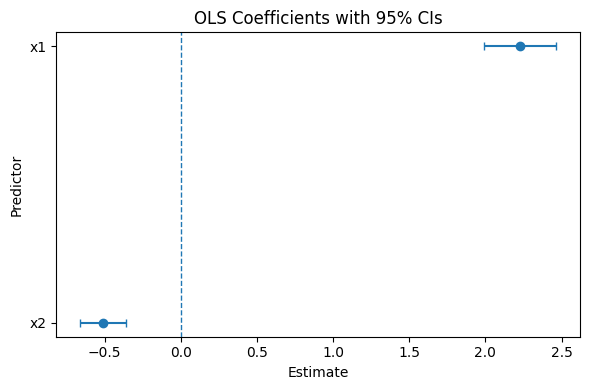

In [9]:
coef = (
    pd.DataFrame({"estimate": mod.params, "ci_low": mod.conf_int()[0], "ci_high": mod.conf_int()[1]})
    .reset_index().rename(columns={"index":"term"})
)
coef = coef[coef["term"]!="Intercept"]            # optional: hide intercept
coef = coef.sort_values("estimate")

plt.figure(figsize=(6,4))
plt.errorbar(
    x=coef["estimate"], y=coef["term"],
    xerr=[coef["estimate"]-coef["ci_low"], coef["ci_high"]-coef["estimate"]],
    fmt="o", capsize=3
)
plt.axvline(0, linestyle="--", linewidth=1)
plt.xlabel("Estimate")
plt.ylabel("Predictor")
plt.title("OLS Coefficients with 95% CIs")
plt.tight_layout()
plt.savefig("coef_plot.png", dpi=200)
plt.show()

### Interpreting Linear Coefficients (Simple Example)

**Setup**
- **y** = *exam score* (points out of 100)  
- **x1** = *hours studied per week* (hours)  
- **x2** = *classes skipped* (count)

**How to say it (template)**
> Increasing **x1** (*hours studied*) by **one hour** **increases** **y** (*exam score*) by **β₁ points**, **holding x2 fixed**.  
> Increasing **x2** (*skipped classes*) by **one class** **decreases** **y** by **β₂ points**, **holding x1 fixed**.

**What to include when you explain a coefficient**
- the **X variable** and its **units**
- the **direction** (increase/decrease)
- the **Y variable** and its **units**
- the **magnitude** (the coefficient)
- the phrase **“holding everything else fixed.”**

> Don’t say only “when X goes up, Y goes up.” Say **how much**, **in which units**, and **what’s held constant**.

In [10]:

# ---- make simple, realistic data ----
np.random.seed(0)
n = 200
hours   = np.clip(np.random.normal(8, 3, n), 0, None)     # study hours/week
skipped = np.clip(np.random.poisson(1.2, n), 0, None)     # classes skipped
# True data-generating process: score = 55 + 2.2*hours - 5.0*skipped + noise
score   = 55 + 2.2*hours - 5.0*skipped + np.random.normal(0, 6, n)

df = pd.DataFrame({"score":score, "hours":hours, "skipped":skipped})

# ---- fit OLS with a formula ----
mod = smf.ols("score ~ hours + skipped", data=df).fit()
print(mod.summary())  # full table (betas, SE, t, p, R^2)

# ---- pull coefficients and auto-generate a sentence ----
b_hours   = mod.params["hours"]
b_skipped = mod.params["skipped"]

print(
    f"\nInterpretation:\n"
    f"• Each additional hour studied per week is associated with a "
    f"{b_hours:.2f}-point increase in exam score, holding skipped classes fixed.\n"
    f"• Each additional class skipped is associated with a "
    f"{b_skipped:.2f}-point change in exam score, holding hours fixed "
    f"(negative means lower scores)."
)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     232.3
Date:                Wed, 17 Sep 2025   Prob (F-statistic):           1.49e-52
Time:                        19:27:37   Log-Likelihood:                -639.44
No. Observations:                 200   AIC:                             1285.
Df Residuals:                     197   BIC:                             1295.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.4193      1.251     44.315      0.0

In [11]:
tab = pd.DataFrame({
    "Predictor": mod.params.index,
    "Estimate":  mod.params.values,
    "Std. Error":mod.bse.values,
    "t":         mod.tvalues.values,
    "p-value":   mod.pvalues.values
})
ci = mod.conf_int()
tab["95% CI"] = [f"[{lo:.2f}, {hi:.2f}]" for lo,hi in ci.values]

# add stars
def stars(p):
    return '***' if p<0.001 else '**' if p<0.01 else '*' if p<0.05 else ''
tab["Estimate"] = tab.apply(lambda r: f"{r['Estimate']:.3f}{stars(r['p-value'])}", axis=1)

styled = (tab[["Predictor","Estimate","Std. Error","t","p-value","95% CI"]]
          .style.format({"Std. Error":"{:.3f}","t":"{:.2f}","p-value":"{:.3g}"})
          .hide(axis="index"))
styled

Predictor,Estimate,Std. Error,t,p-value,95% CI
Intercept,55.419***,1.251,44.31,2.09e-104,"[52.95, 57.89]"
hours,2.193***,0.138,15.88,4.03e-37,"[1.92, 2.47]"
skipped,-5.817***,0.369,-15.78,8.55e-37,"[-6.54, -5.09]"


----
## Lab Housing prices



In [12]:
# let's generate some housing price data 
n = 150

# Base drivers (rough CA-like ranges)
sqft = np.clip(np.random.normal(1800, 800, n), 600, 4500)      # living area (sqft)
baths = np.clip(np.random.normal(2.3, 0.8, n), 1, 5).round(1)  # bathrooms
dist  = np.random.uniform(1, 35, n)                            # miles to core/job center
school = np.clip(np.random.normal(7.2, 2.5, n), 1, 10).round(1)# school rating (1-10)
coastal = np.random.binomial(1, 0.55, n)                       # ~35% coastal

# Use hundreds of sqft for cleaner coefficients
sqft_100 = sqft / 100.0

price = (120000
         + 40000*sqft_100
         + 55000*baths
         + -6000*dist
         + 15000*school
         + 150000*coastal
         + np.random.normal(0, 120000, n))

df = pd.DataFrame({
    "price": price.astype(float),
    "sqft_100": sqft_100.astype(float),
    "baths": baths.astype(float),
    "dist": dist.astype(float),
    "school": school.astype(float),
    "coastal": coastal.astype(int)
})

df.head(), df["price"].median()

(          price   sqft_100  baths       dist  school  coastal
 0  4.750134e+05  11.616603    1.8  27.560557     6.5        0
 1  1.372575e+06  30.533832    2.5   6.743488     3.4        0
 2  1.506215e+06  26.955679    1.1  13.718129     6.0        1
 3  8.005829e+05  10.251363    1.7  15.068527     8.6        1
 4  1.384994e+06  27.865830    1.0  24.336928     9.1        1,
 np.float64(1005649.9789147207))

In [15]:
### Q1 Estimate a model predicing house prices as a function of square foot and baths
mod1 = smf.ols("price ~ sqft_100 + baths", data=df).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     181.0
Date:                Wed, 17 Sep 2025   Prob (F-statistic):           2.24e-40
Time:                        19:28:12   Log-Likelihood:                -2012.9
No. Observations:                 150   AIC:                             4032.
Df Residuals:                     147   BIC:                             4041.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.713e+05   5.53e+04      4.909      0.0

In [ ]:
### Q2 Communicate in words the coefficient on baths
#Each additional bathroom is associated with an estimated increase of approximately $55,000 in house price, holding square footage constant. This suggests that homes with more bathrooms tend to sell for higher prices, independent of their size.

In [16]:
### Q3 Estimate a model predicing house prices as a function of all predictor variables
mod2 = smf.ols("price ~ sqft_100 + baths + dist + school + coastal", data=df).fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     166.3
Date:                Wed, 17 Sep 2025   Prob (F-statistic):           5.58e-58
Time:                        19:30:37   Log-Likelihood:                -1962.6
No. Observations:                 150   AIC:                             3937.
Df Residuals:                     144   BIC:                             3955.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.095e+05   5.99e+04      1.828      0.0

In [ ]:
### Q4 Communicate in words the coefficient on sqft_100
#The coefficient on sqft_100 represents the estimated change in house price for each additional 100 square feet of living space, holding all other variables constant. A positive coefficient indicates that larger homes tend to sell for higher prices, while a negative coefficient suggests the opposite.

## Hypthesis Testing


In [17]:
# --- Fit regression: Price on sqft and baths ---
mod = smf.ols("price ~ sqft_100 + baths + dist + school + coastal", data=df).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     166.3
Date:                Wed, 17 Sep 2025   Prob (F-statistic):           5.58e-58
Time:                        20:10:47   Log-Likelihood:                -1962.6
No. Observations:                 150   AIC:                             3937.
Df Residuals:                     144   BIC:                             3955.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.095e+05   5.99e+04      1.828      0.0

## Using the Estimated Model to Predict House Prices

Once we estimate a regression model, we can use it to predict housing prices for new data.

---

#### Steps:
- Fit the model with your training data.  
- Create a new `DataFrame` with the same predictor columns as in the model.  
- Use `.predict()` to get the predicted price.  


Once we estimate a regression model, we can use it to predict housing prices for new data.

---

#### Steps:
- Fit the model with your training data.  
- Create a new `DataFrame` with the same predictor columns as in the model.  
- Use `.predict()` to get the predicted price.  



In [18]:
# Example house: 2,000 sqft (20 in 100s), 
# 2.5 baths, 8 miles, school=8, coastal
new_house = pd.DataFrame({
    "sqft_100": [2000/100],
    "baths":    [2.5],
    "dist":     [8],
    "school":   [8],
    "coastal":  [1],
})

pred_price = mod.predict(new_house)[0]
print(f"Predicted price: ${pred_price:,.0f}")

Predicted price: $1,281,452


In [19]:
new_listings = pd.DataFrame({
    "sqft_100": [18, 24, 30],       # 1,800; 2,400; 3,000 sqft
    "baths":    [2.0, 3.0, 3.5],
    "dist":     [12, 5, 22],
    "school":   [7, 9, 6],
    "coastal":  [0, 1, 0],
})

new_listings["pred_price"] = mod.predict(new_listings)
new_listings

,sqft_100,baths,dist,school,coastal,pred_price
0,18,2.0,12,7,0,9.527317e+05
1,24,3.0,5,9,1,1.493174e+06
2,30,3.5,22,6,0,1.415448e+06


### Building Training and Testing Sets in Python

When we build predictive models, we don’t want to test them on the same data we used to train them.  
To make sure our models generalize well, we split the dataset into two parts:  

- **Training set**: the portion of the data used to estimate the model parameters.  
- **Testing set**: a separate portion of the data used only to evaluate how well the model performs on unseen data.  

A common choice is to use about 70–80% of the data for training and the remaining 20–30% for testing.  
This ensures we can both train the model effectively and still have enough data left to check its accuracy.  

In [20]:
# Split data: 75% training, 25% testing
train_df, test_df = train_test_split(df, test_size=0.25, random_state=1818)

print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)

Training set shape: (112, 6)
Testing set shape: (38, 6)


### In-Sample vs. Out-of-Sample Predictions

- **In-sample predictions**: Predictions for the same data used to train the model.  
  - These will usually fit well (sometimes too well).  

- **Out-of-sample predictions**: Predictions for the test set (data not used for training).  
  - These show how well the model generalizes to unseen data.  

⚠️ **Important:** We always estimate the model on the **training set only**.  
Never train on the test set — it’s reserved for evaluation.  

In [21]:
mod = smf.ols("price ~ sqft_100 + baths + dist + school + coastal", 
data=train_df).fit()

# --- In-sample predictions (training data) ---
preds_train = mod.predict(train_df)

# --- Out-of-sample predictions (test data) ---
preds_test = mod.predict(test_df)

# Preview
print("First 5 in-sample predictions:", preds_train.head().round(0).tolist())
print("First 5 out-of-sample predictions:", preds_test.head().round(0).tolist())

First 5 in-sample predictions: [650306.0, 814081.0, 557209.0, 699631.0, 992567.0]
First 5 out-of-sample predictions: [1213262.0, 1347873.0, 651556.0, 982613.0, 1118869.0]


### Root Mean Squared Error (RMSE)

RMSE measures the **average size of prediction errors**.  
It tells us, on average, how far our predictions are from the actual values.  

$$
\mathrm{RMSE} \;=\; \sqrt{\frac{1}{n}\sum_{i=1}^{n}\left(y_i - \hat{y}_i\right)^2}
$$

- **Lower RMSE → more accurate model**  
- **Train RMSE**: error when predicting on the **training set**  
- **Test RMSE**: error when predicting on the **test set**  
- If **test error > train error** → model may be **overfit** (too closely fitted to training data)  
- If **test error < train error** → model may be **underfit** (too simple, missing patterns)  
- Ideally: **Test error ≈ Train error** → model generalizes well  

In [22]:
# Define RMSE function
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

# Training error
train_rmse = rmse(train_df["price"], preds_train)

# Test error
test_rmse = rmse(test_df["price"], preds_test)

print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE:  {test_rmse:.2f}")

Train RMSE: 112573.33
Test RMSE:  129374.13


## 📊 Why Use Log Transformations?

- Raw housing prices are often **very skewed** (a few very expensive homes pull the distribution to the right).  
- Many regression methods assume errors are **normally distributed**. Skew can hurt predictions.  
- Taking the **natural log** (`np.log`) compresses large values and spreads out small values.  
- This makes the distribution more symmetric and easier for linear regression to model.  

---

### 🔢 What is the Natural Log?

- The **natural logarithm** uses base $e \; (\approx 2.718)$.  
- It answers: *“What power must I raise $e$ to in order to get this number?”*  
  - Example: $\ln(1) = 0$ because $e^0 = 1$.  
  - Example: $\ln(10) \approx 2.3$ because $e^{2.3} \approx 10$.  
- In regression, we often use $\ln(\text{price})$ instead of `price`.  
- **Interpretation**: coefficients become *percentage effects* (approximate).  
  - Example: a coefficient of $0.05$ means a 1-unit increase in $X$ increases house price by **about 5%**.  



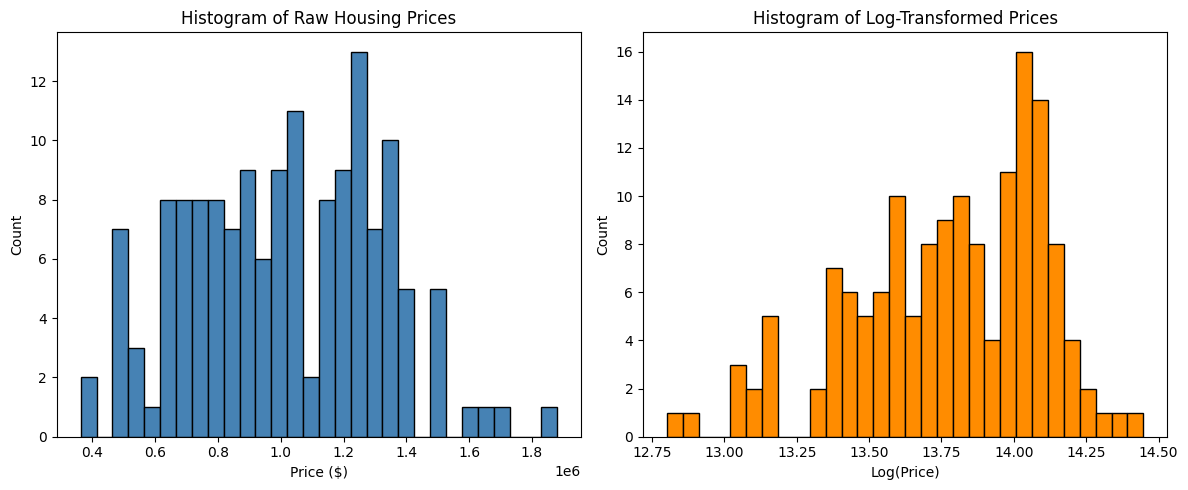

In [23]:
# Add log-transformed housing price to your existing data
df["log_price"] = np.log(df["price"])

# Plot histograms: raw vs log-transformed prices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Raw price histogram
axes[0].hist(df["price"], bins=30, color="steelblue", edgecolor="black")
axes[0].set_title("Histogram of Raw Housing Prices")
axes[0].set_xlabel("Price ($)")
axes[0].set_ylabel("Count")

# Logged price histogram
axes[1].hist(df["log_price"], bins=30, color="darkorange", edgecolor="black")
axes[1].set_title("Histogram of Log-Transformed Prices")
axes[1].set_xlabel("Log(Price)")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

In [24]:
# Add log-transformed variables
df["log_price"] = np.log(df["price"])
df["log_sqft"] = np.log(df["sqft_100"] * 100)  # back to sqft for realism

# Fit log-log model: log(price) ~ log(sqft) + baths
mod_loglog = smf.ols("log_price ~ log_sqft + baths", data=df).fit()
print(mod_loglog.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     156.9
Date:                Wed, 17 Sep 2025   Prob (F-statistic):           3.40e-37
Time:                        20:11:04   Log-Likelihood:                 40.473
No. Observations:                 150   AIC:                            -74.95
Df Residuals:                     147   BIC:                            -65.91
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.2411      0.256     36.036      0.0

### 📖 How to Interpret Log–Log Regression Coefficients  

When both the dependent variable and independent variable(s) are logged, the regression model is called a **log–log model**.  

$$
\ln(Y) = \beta_0 + \beta_1 \ln(X) + \cdots + \epsilon
$$  

- **Dependent variable ($Y$)**: logged (e.g., $\ln(\text{price})$)  
- **Independent variable ($X$)**: also logged (e.g., $\ln(\text{sqft})$)  

---

#### 🔹 Interpretation: Elasticities  
- A coefficient $\beta_1$ in a log–log model is an **elasticity**.  
- It tells us the **percentage change in $Y$** for a **1% change in $X$**.  

---

#### 🏡 Example: Housing Price Regression  
Suppose we estimate:  

$$
\ln(\text{price}) = \beta_0 + 0.6 \cdot \ln(\text{sqft}) + 0.08 \cdot \text{baths} + \epsilon
$$  

- **Square footage (log_sqft coefficient = 0.6)**  
  - A **1% increase in square footage** is associated with about a **0.6% increase in house price**, holding bathrooms constant.  

- **Bathrooms (baths coefficient = 0.08)**  
  - Adding **one bathroom** increases house price by about **8%**, all else equal.  

---

#### 🔹 Why Use Log–Log Models?  
- Makes coefficients easier to interpret as **percent changes**.  
- Handles **skewed data** (e.g., housing prices, incomes).  
- Useful for studying **elasticities** in economics and business.  

---

👉 **Rule of Thumb**:  
- **Linear model**: coefficient = unit change in $Y$ for a one-unit change in $X$.  
- **Log–linear model**: coefficient ≈ % change in $Y$ for a one-unit change in $X$.  
- **Log–log model**: coefficient ≈ % change in $Y$ for a **1% change in $X$** (elasticity).  

## 🏡 Lab: Log–Log Regression and Interpretation (Extended)

---

### Q1. Log–log with distance
Estimate a regression of `log(price)` on `log(dist)`.  
- What does the coefficient on `log(dist)` mean?  
- Do you expect it to be positive or negative? Why?  


In [26]:
df['log_dist'] = np.log(df['dist'])

mod_loglog = smf.ols("log_price ~ log_dist", data=df).fit()
print(mod_loglog.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2.857
Date:                Wed, 17 Sep 2025   Prob (F-statistic):             0.0931
Time:                        20:12:47   Log-Likelihood:                -43.779
No. Observations:                 150   AIC:                             91.56
Df Residuals:                     148   BIC:                             97.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.9420      0.102    136.558      0.0


### Q2. Log–log with school quality
Run a regression of `log(price)` on `log(school)`.  
- How should we interpret the coefficient?  
- What does it mean if the coefficient = 0.12?  


In [27]:
df['log_school'] = np.log(df['school'])

mod_loglog = smf.ols("log_price ~ log_school", data=df).fit()
print(mod_loglog.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                  0.003757
Date:                Wed, 17 Sep 2025   Prob (F-statistic):              0.951
Time:                        20:13:14   Log-Likelihood:                -45.211
No. Observations:                 150   AIC:                             94.42
Df Residuals:                     148   BIC:                             100.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.7830      0.127    108.154      0.0

### Q3. Multiple predictors
Estimate a model with `log(price)` on `log(dist)` and `log(school)`.  
- Interpret both coefficients.  


In [29]:
mod_loglog = smf.ols("log_price ~ log_dist +log_school", data=df).fit()
print(mod_loglog.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.420
Date:                Wed, 17 Sep 2025   Prob (F-statistic):              0.245
Time:                        20:13:48   Log-Likelihood:                -43.778
No. Observations:                 150   AIC:                             93.56
Df Residuals:                     147   BIC:                             102.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.9466      0.160     87.376      0.0

### Q4. Prediction
Use your model from Q3 to predict the **price of a house** with:  
- 2,000 sqft, 2 baths, 8 miles from the city center, school quality = 6, coastal = 1.  
Remember to convert the prediction from `log(price)` back to **dollars**.  

In [32]:
# Prepare input for log-log model
house_features = pd.DataFrame({
    "log_dist": [np.log(8)],
    "log_school": [np.log(6)]
})

# Predict log(price) and convert to dollars
log_pred_price = mod_loglog.predict(house_features)[0]
pred_price = np.exp(log_pred_price)
print(f"Predicted price: ${pred_price:,.0f}")

Predicted price: $999,347
